In [1]:
# business_cycles.ipynb

# Looking at autocorrelation in real world data.

# NYU course ECON-UB 233, Macro foundations for asset pricing.

# Written by: Mike Saint-Antoine for Dave Backus

In [2]:
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# autocorrelation function
# took me like 5 hours to write this...... lol

def acf(x,nrho):

    nobs = len(x)
    xbar = np.mean(x)

    xdev = []

    for item in x:
        xdev.append(item-xbar)

    gamma = []

    for k in range(nrho+1):
        xlags = np.zeros(nobs)
        xlags[k:nobs] = xdev[0:nobs-k]
        xlagsproduct = []

        for i in range(len(xlags)):
            xlagsproduct.append(xlags[i]*xdev[i])
        gamma.append(sum(xlagsproduct))

    rho = []
    for i in range(len(gamma)):
        rho.append(gamma[i]/gamma[0])

    return rho

In [4]:
# reading in the data


data = pandas.ExcelFile("FRED_qtrly.xls")
data = data.parse("edited")




# getting an array of dates
dates = []
for row in data["DATE"]:
    dates.append(row)


nobs = len(dates)
# should be 208





# getting the data into arrays

# levels
GDPC96 = []
for row in data["GDPC96"]:
    GDPC96.append(math.log(row))

PCECC96 = []
for row in data["PCECC96"]:
    PCECC96.append(math.log(row))

SP500 = []
for row in data["SP500"]:
    SP500.append(math.log(row))

INDPRO = []
for row in data["INDPRO"]:
    INDPRO.append(math.log(row))

GS10 = []
for row in data["GS10"]:
    GS10.append(math.log(row))

# rates

PAYEMS = []
for row in data["PAYEMS"]:
    PAYEMS.append(row)

FEDFUNDS = []
for row in data["FEDFUNDS"]:
    FEDFUNDS.append(row)


In [5]:
# calculating quarterly growth
GDPC96_growth = []
for i in range(len(GDPC96)-1):
    GDPC96_growth.append(400 * (GDPC96[i+1] - GDPC96[i]))

PCECC96_growth = []
for i in range(len(PCECC96)-1):
    PCECC96_growth.append(400 * (PCECC96[i+1] - PCECC96[i]))

SP500_growth = []
for i in range(len(SP500)-1):
    SP500_growth.append(400 * (SP500[i+1] - SP500[i]))

INDPRO_growth = []
for i in range(len(INDPRO)-1):
    INDPRO_growth.append(400 * (INDPRO[i+1] - INDPRO[i]))

GS10_growth = []
for i in range(len(GS10)-1):
    GS10_growth.append(400 * (GS10[i+1] - GS10[i]))


# calculating yearly growth
GDPC96_yearlygrowth = []
for i in range(len(GDPC96)-4):
    GDPC96_yearlygrowth.append(100 * (GDPC96[i+4] - GDPC96[i]))

PCECC96_yearlygrowth = []
for i in range(len(PCECC96)-4):
    PCECC96_yearlygrowth.append(100 * (PCECC96[i+4] - PCECC96[i]))

SP500_yearlygrowth = []
for i in range(len(SP500)-4):
    SP500_yearlygrowth.append(100 * (SP500[i+4] - SP500[i]))

INDPRO_yearlygrowth = []
for i in range(len(INDPRO)-4):
    INDPRO_yearlygrowth.append(100 * (INDPRO[i+4] - INDPRO[i]))

GS10_yearlygrowth = []
for i in range(len(GS10)-4):
    GS10_yearlygrowth.append(100 * (GS10[i+4] - GS10[i]))

In [6]:
# autocorrelation functions

nlags = 20


acf_gdp_yoy = acf(GDPC96_yearlygrowth,nlags)
acf_gdp = acf(GDPC96_growth,nlags)
acf_pcecc96 = acf(PCECC96_growth,nlags)
acf_sp500 = acf(SP500_growth,nlags)
acf_payems = acf(PAYEMS,nlags)
acf_fedfunds = acf(FEDFUNDS,nlags)
acf_gs10 = acf(GS10_growth,nlags)


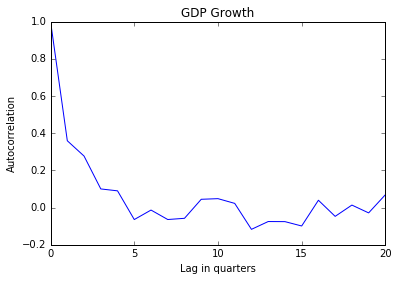

In [7]:
# graphs of autocorrelation functions

# figure 1

plt.plot(list(range(len(acf_gdp))),acf_gdp)
plt.title('GDP Growth')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()

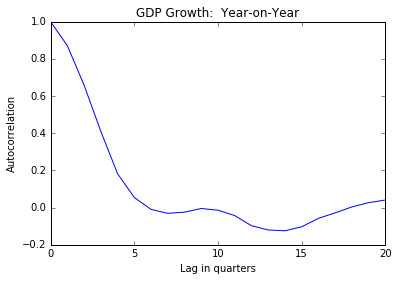

In [8]:
# figure 2

plt.plot(list(range(len(acf_gdp_yoy))),acf_gdp_yoy)
plt.title('GDP Growth:  Year-on-Year')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()

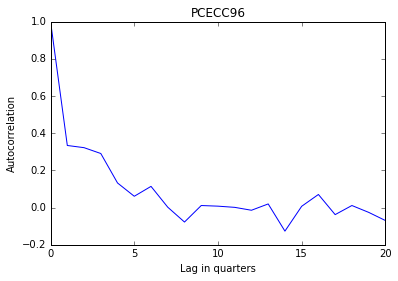

In [9]:
# figure 3

plt.plot(list(range(len(acf_pcecc96))),acf_pcecc96)
plt.title('PCECC96')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()

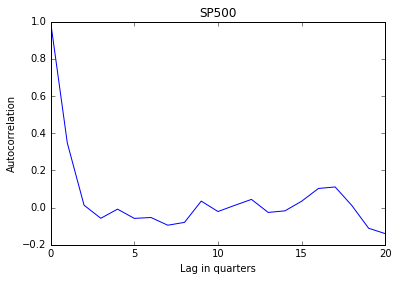

In [10]:
# figure 4

plt.plot(list(range(len(acf_sp500))),acf_sp500)
plt.title('SP500')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()

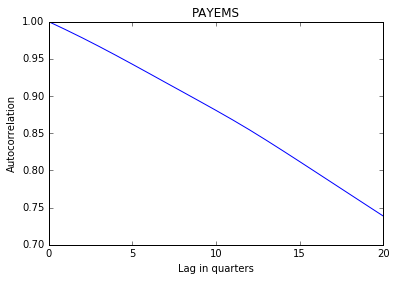

In [11]:
# figure 5

plt.plot(list(range(len(acf_payems))),acf_payems)
plt.title('PAYEMS')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()

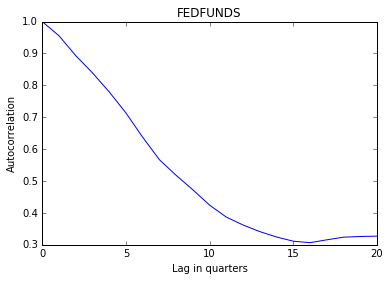

In [12]:
# figure 6

plt.plot(list(range(len(acf_fedfunds))),acf_fedfunds)
plt.title('FEDFUNDS')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()

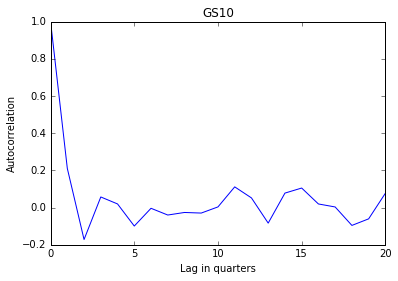

In [13]:
# figure 7

plt.plot(list(range(len(acf_gs10))),acf_gs10)
plt.title('GS10')
plt.xlabel('Lag in quarters')
plt.ylabel('Autocorrelation')
plt.show()